In [77]:
#STEPS FOR PROJECT
#LOOK AT THE BIG PICTURE
#GET THE DATA
#DISCOVER AND VISUALIZE THE DATA 
#PREPARE THE DATA FROM MACHINE LEARNING ALGORITHMS
#SELECT AND TRAIN THE MODEL
#FINE TUNE YOUR MODEL
#PRESENT YOUR SOLUTION
#LAUNCH MONITOR AND MAINTAIN YOUR SYSTEM

1. Business Problem
The main goal of this project is to find the price of the Bengaluru House using their features.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

2.Load Dataset


In [79]:
path="C:\\Users\\kritika\\Downloads\\Compressed\\Bengaluru_House_Data.csv"
df_raw=pd.read_csv(path)
df_raw.shape

(13320, 9)

In [80]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [81]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


3.Exploratory Data Analysis

In [82]:
df=df_raw.copy()#to get copy of raw data

In [83]:
#get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [84]:
#We have only 3 numerical feature 
#6 categorical variable->area type,availability
#target feature -> price
#price in lakh

In [85]:
df.describe()
#observe 75% and max value is showing huge difference

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


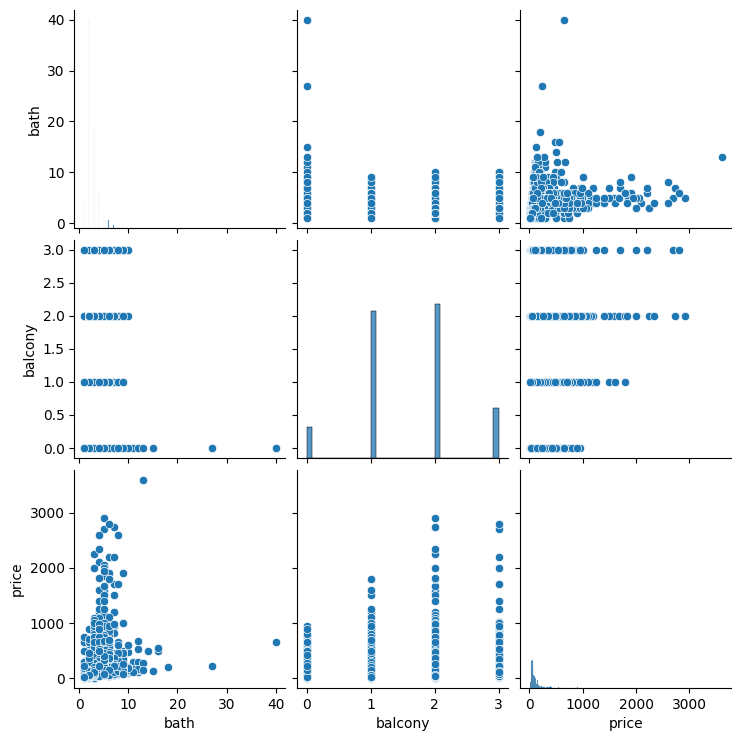

In [86]:
sns.pairplot(df)

#bath and price have slighty linear correaltion with some outlier

In [87]:
#value count for each feature
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("----------------------------")

In [88]:
value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------
availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
19-Sep                     21
17-Oct                     21
22-Jun                     19
19-Aug                     18
21-Jun                    

<Axes: >

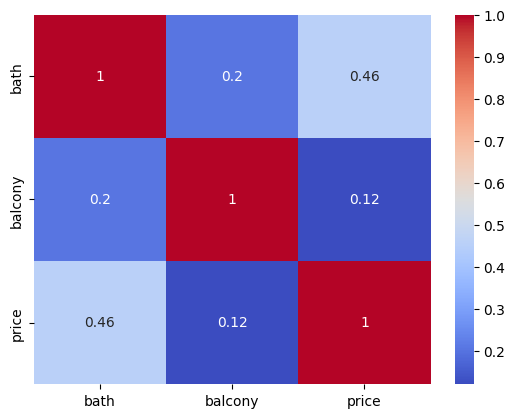

In [89]:
#Correlation heatmap
num_vars=["bath","balcony","price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm",annot=True)

#correlation of bath is greater than balcony with price

#PREPARE DATA FOR MACHINE LEARNING MODEL

In [90]:
df.isnull().sum()#find the homuch missing data available

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [91]:
df.isnull().mean()*100 #% of meaning values

#society has 41.3% missing values (need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

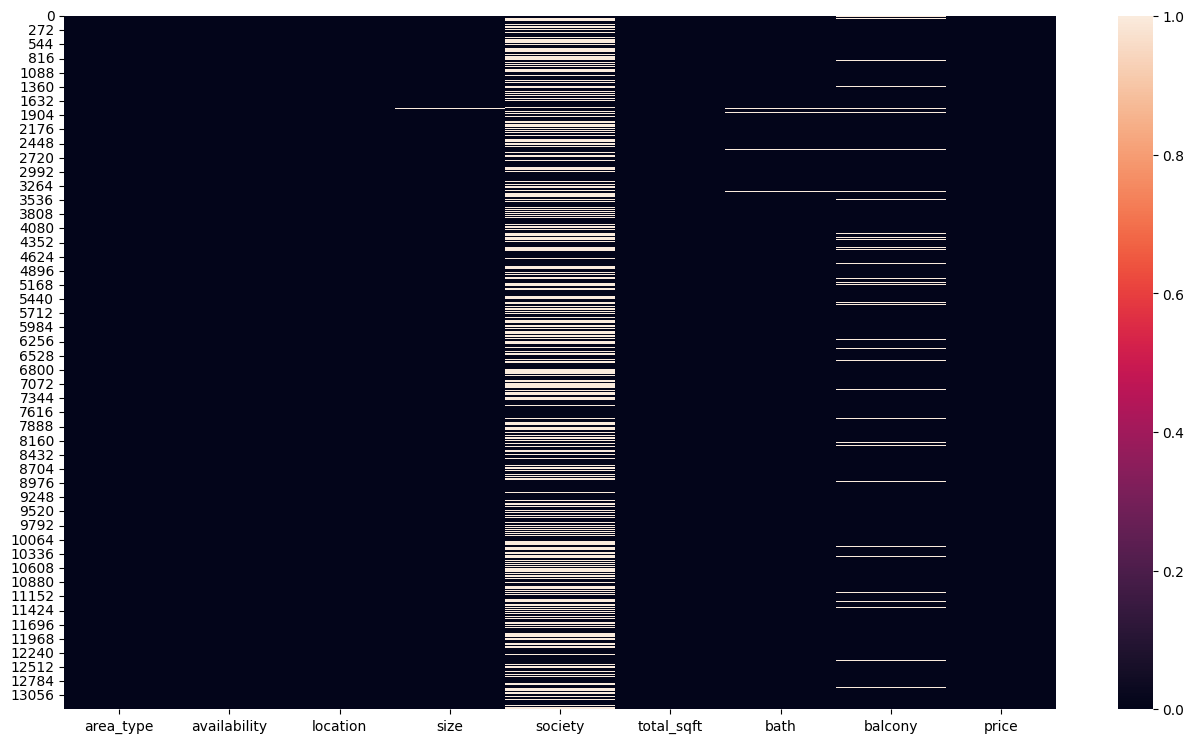

In [92]:
#visualize missing values using heatmap to get idea where is the vslue missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [93]:
#drop--->society feature
#because 41.3% missing values
df2=df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [94]:
#fill mean value in balcony feature
#because it contain 4.5% missing value

df2['balcony']=df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [95]:
#drop na value rows from df2
#because there is very less % value missing
df3=df2.dropna()
df3.shape

(13246, 8)

In [96]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [97]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


FEATURE ENGINEERING

In [98]:
#TO SHOW ALL THE COLUMNS AND ROWS
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Convert 'total_sqft' cat feature in numeric 

In [99]:
df3['total_sqft'].value_counts()

#here we observe that 'total_sqft' contain string values in different format
#float,int like 1854.23,815
#range value:540 - 740
#number and string: 142.845sq. meter,1175q, yars,1 ground

#best strategy is to convert it into number by splitting it



total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1160                  60
1125                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1225                  48
1175          

In [100]:
total_sqft_int=[]
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))#if '123.4' like this value in str then conver in float
    except:
        try:
          temp=[]
          temp=str_val.split('-')
          total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)#'123-534' this str value split 
        except:
            total_sqft_int.append(np.nan)

In [101]:
df4=df3.reset_index(drop=True) #drop=True- don't add index column in df


In [102]:
#join df4 and total_sqft_int list
df5=df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [103]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [104]:
df6=df5.dropna()
df6.shape

(13200, 9)

In [105]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


WORKING ON SIZE FEATURE

In [106]:
df6['size'].value_counts()

#size feature shows the number of rooms

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [107]:
size_int=[]
for str_val in df6['size']:
    temp=[]
    temp=str_val.split(" ")
    try:
      size_int.append(int(temp[0]))
    except:
       size_int.append(np.nan)
       print("Noice=",str_val)

In [108]:
df6=df6.reset_index(drop=True)

In [109]:
#join df6 and list size_int

df7=df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [110]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


FINDING OUTLIER AND REMOVING

In [111]:
#function to create histogram, Q-Q plot and boxplot

#for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df,variable):
    #function takes a dataframe (df) and 
    #the variable of interest as arguments

    #define figure size
    plt.figure(figsize=(8,4))

    #histogram
    plt.subplot(1,3,1)
    sns.displot(df[variable],bins=30)
    plt.title('Histogram')


    #Q-Q plot
    plt.figure(figsize=(8,4))
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.ylabel("Variable quantiles")
    

    #Box Plot
    plt.figure(figsize=(8,4))
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


******bath*******


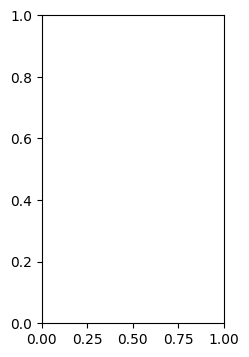

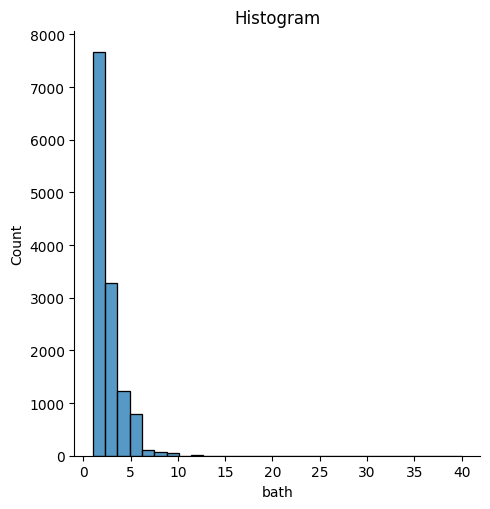

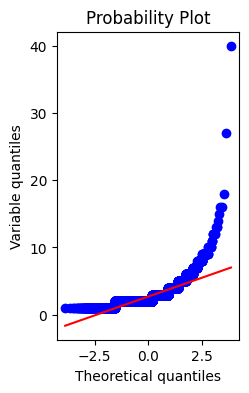

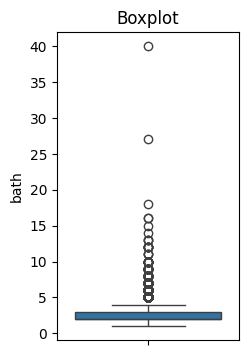

******balcony*******


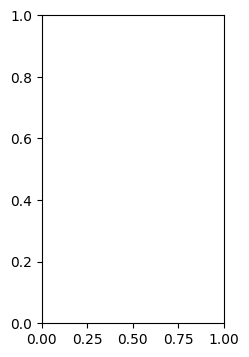

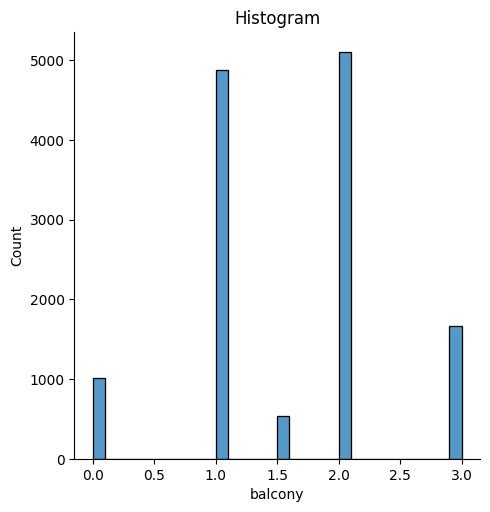

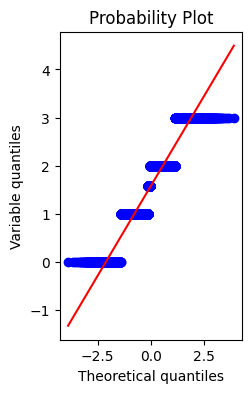

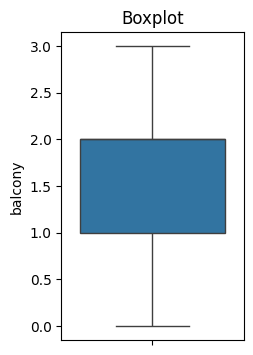

******total_sqft_int*******


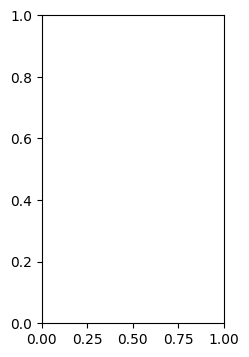

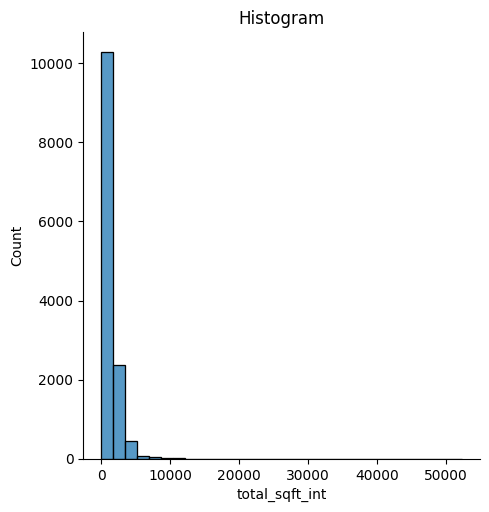

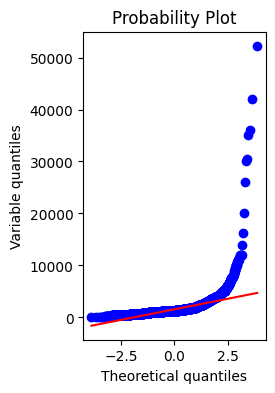

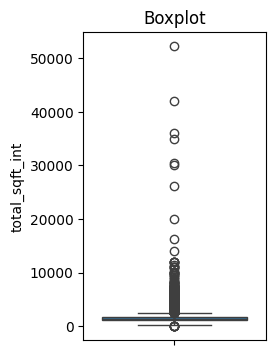

******bhk*******


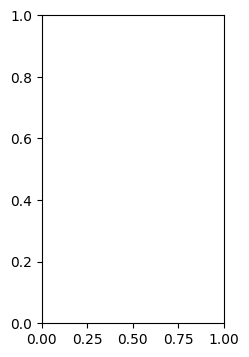

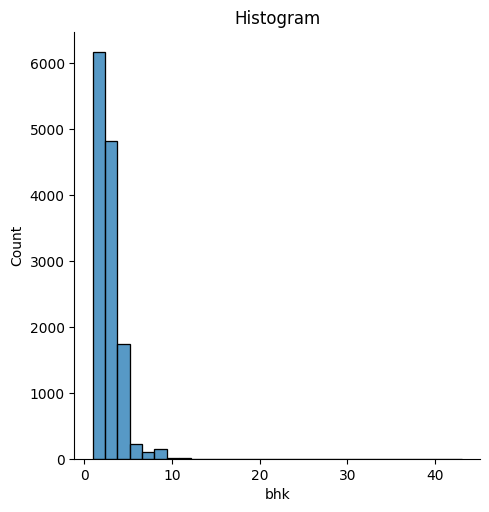

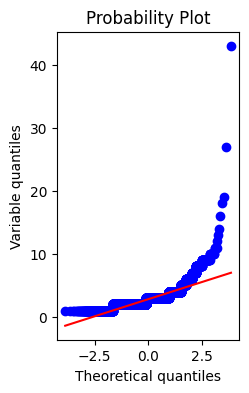

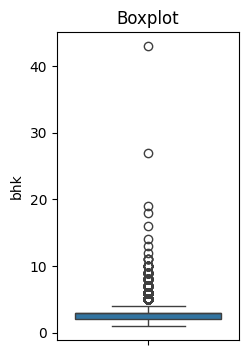

******price*******


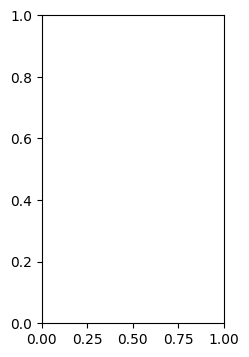

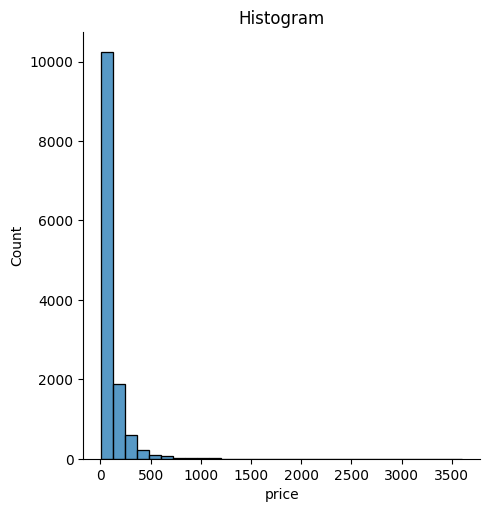

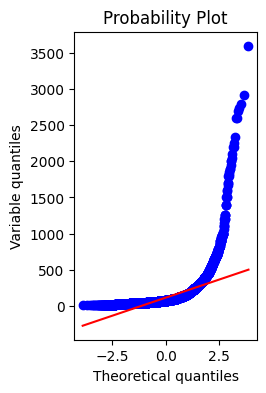

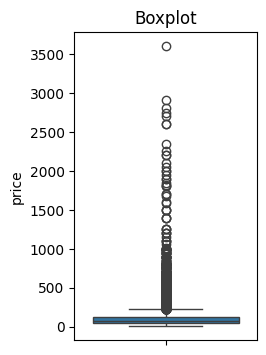

In [112]:
num_var=['bath','balcony','total_sqft_int','bhk','price']
for var in num_var:
    print("******{}*******".format(var))
    diagnostic_plots(df7,var)

#here we observe outlier using histogram qq plot and box plot

In [113]:
# here we consider  1  Bhk  requiered  min 350 sqft are 
df7[df7['total_sqft_int']/df7['bhk']<350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [114]:
# if 1 BHK total_sqft are < 350 then we are going to remove them 
df8 = df7[~(df7['total_sqft_int']/df7['bhk']<350)]
df8.shape

(12106, 10)

In [115]:
# create new feature  that is price per squre foot 
# it help to find the outliers 

# price in lakh so conver into rupee and then / by total_sqft_int 

df8['price_per_sqft']= df8['price']*100000/ df8['total_sqft_int']
df8.head()

C:\Users\kritika\AppData\Local\Temp\ipykernel_26316\3968078470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft']= df8['price']*100000/ df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [116]:
df8.price_per_sqft.describe()

#here we can see huge differnce between min and max price_per_sqft
#min 6308.502826 max 17640.588235

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [117]:
# removing outliers using help of 'price per sqrt ' taking std  and mean per location 

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduce_df],ignore_index=True)
    return df_out


df9 = remove_pps_outliers(df8)
df9.shape

(8888, 11)

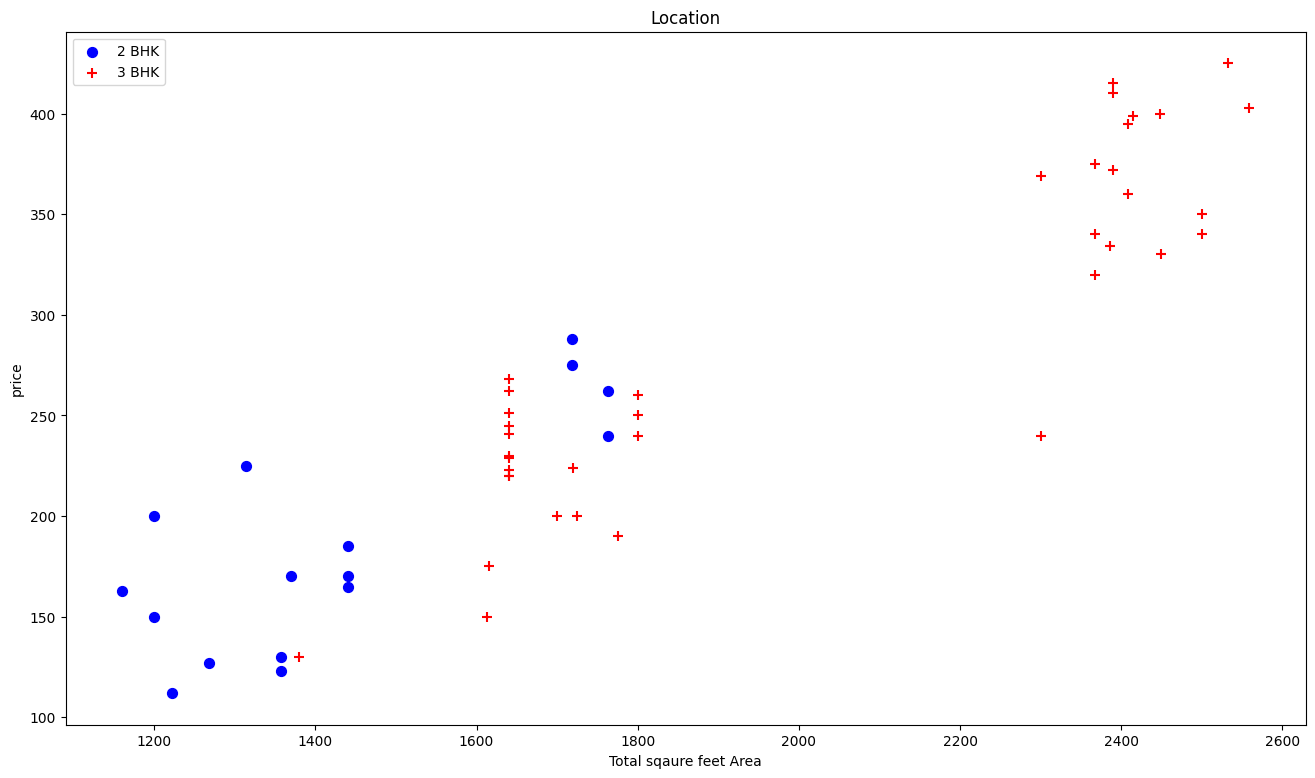

In [118]:
def plot_scatter_chart(df,location):
    bhk2  = df[(df.location ==location) &(df.bhk==2)]
    bhk3  = df[(df.location ==location) &(df.bhk==3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft_int, bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft_int, bhk3.price,color='RED',label='3 BHK',s=50, marker="+")
    plt.xlabel("Total sqaure feet Area")
    plt.ylabel("price")
    plt.title("Location")
    plt.legend()

plot_scatter_chart(df9, "Rajaji Nagar")  # Correct spelling



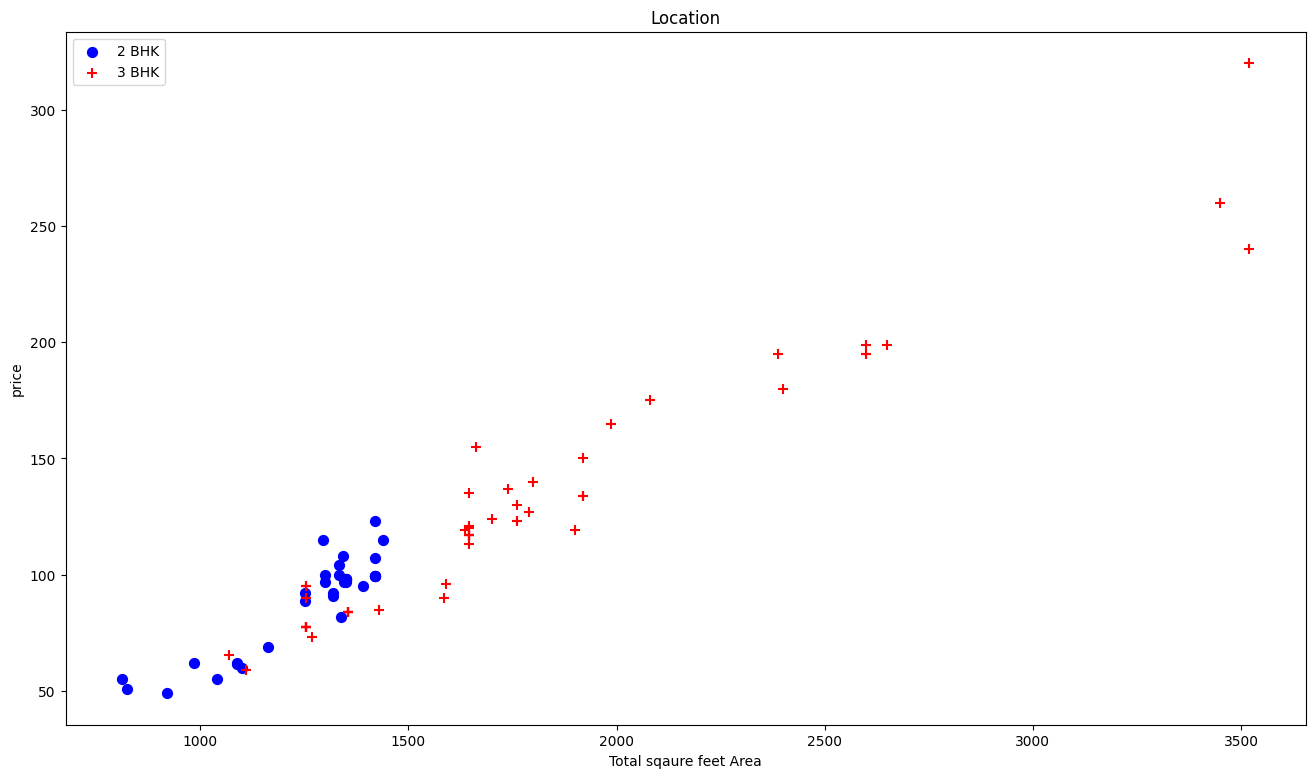

In [119]:
plot_scatter_chart(df9,"Hebbal")
# in below scatterplot we observe that at same location price  of 
# 3 bhk house is less than 2 bhk so it is outlier

In [120]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df10 = remove_bhk_outliers(df9)
df10.shape



(7194, 11)

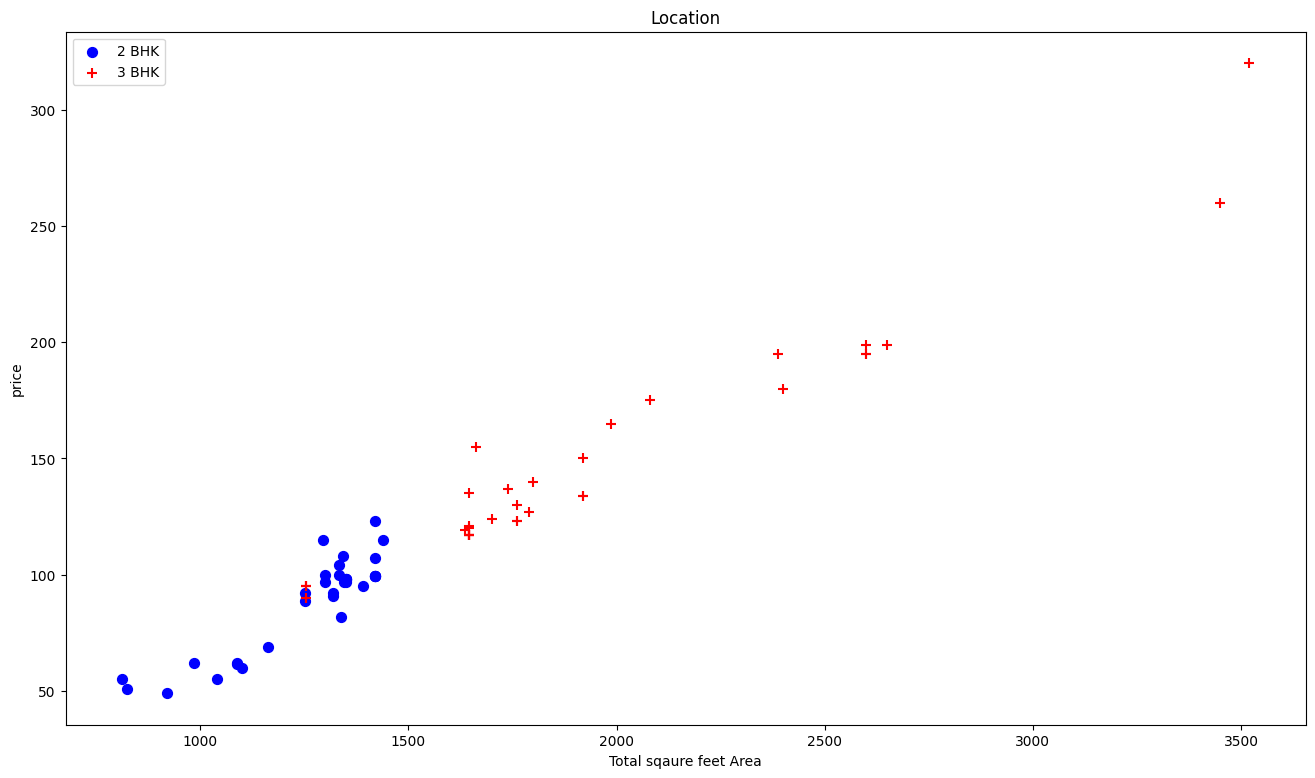

In [121]:
plot_scatter_chart(df10,"Hebbal")
# in below scatterplot most of the red data the r

REMOVE OUTLIERS USING BATH FEATURE

In [122]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [123]:
df10[df10.bath>df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [124]:
#here we are considering data only total no bathroom=bhk+1
df11=df10[df10.bath<df10.bhk+2]
df11.shape

(7120, 11)

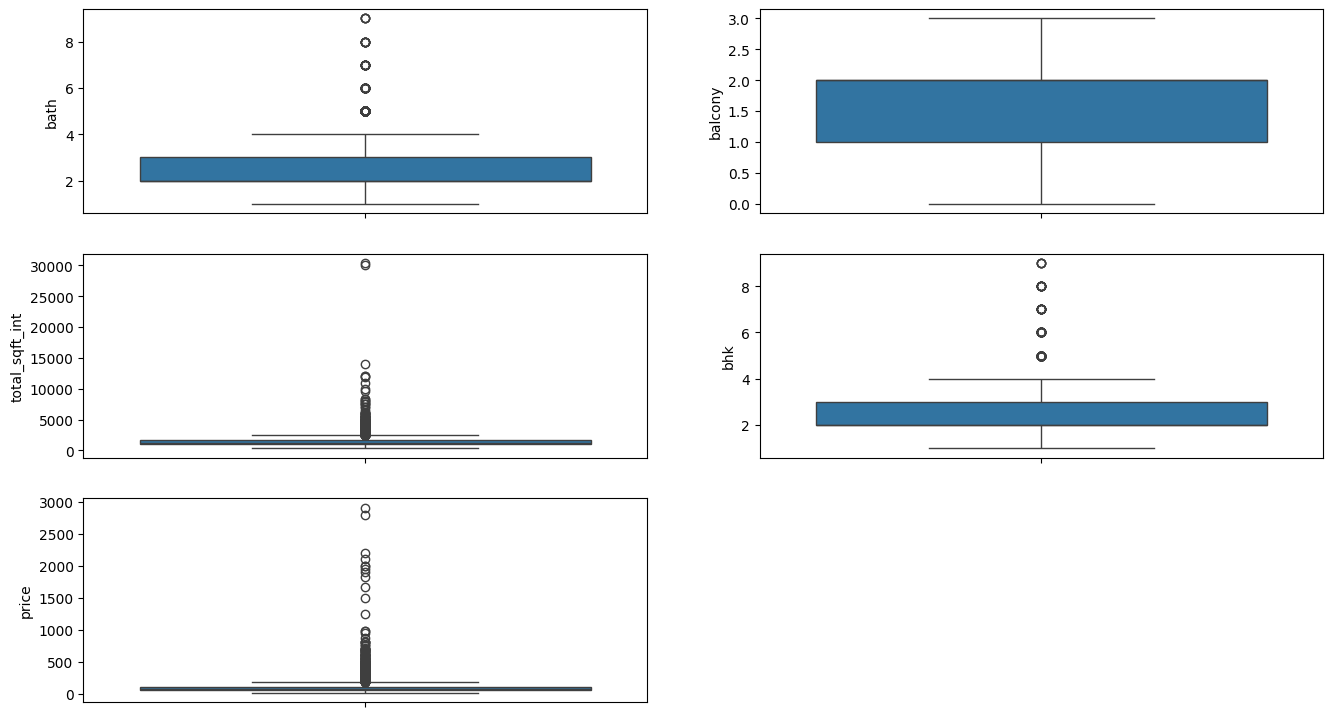

In [125]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df11[var])

In [126]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [127]:
df12=df11.drop(['area_type','availability','location','size','total_sqft'],axis=1)
df12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [128]:
df12.to_csv("clean_data.csv",index=False)#test ml model on this data
#ML model trIN ON THIA Dt nd got best score 

Categorical Variable Encoding

In [129]:
df13=df11.drop(['size','total_sqft'],axis=1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [130]:
df14=pd.get_dummies(df13,drop_first=True,columns=['area_type','availability','location'])
df14.shape

(7120, 820)

In [131]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bag

In [132]:
df14.to_csv("oh_encoded_data.csv",index=False)#test ml model on this data

In ['area_type','availability','location'] contain multiple classes and if we convert into OHE so it increase the size of DF so try to use those classedwhich are frequently present in the car var

WORKING ON AREA TYPE FEATURE

In [133]:
df13['area_type'].value_counts()

area_type
Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: count, dtype: int64

In [134]:
df15=df13.copy()
#apply onehot encing on area feature
for cat_var in["Super built-up Area","Built-up","Plot Area"]:
    df15["area_type"+cat_var]=np.where(df15['area_type']==cat_var,1,0)
df15.shape

(7120, 12)

In [135]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0


WORKING WITH AVAILABILITY FEATURE 

In [136]:
df15["availability"].value_counts()

availability
Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
19-Jan             19
20-Jan             18
18-Sep             18
18-Jan             17
17-Dec             14
21-Mar             13
17-Oct             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
21-Jan             10
17-Jun              9
19-Apr              9
22-Dec              7
19-Oct              7
20-Jun              7
20-Aug              6
20-Oct              6
17-Sep              6
21-Jul              6
17-May              6
21-Feb              5
20-Sep              5
17-Apr              4
20-Nov              4
17-Nov              4
21-Oct             

In [137]:
#in availabilitt feature,10525 house 'Ready to move' and remaining will be ready on particular data
#so we create new feature "availability_ready to move" and add value 1 if availability is ready to move
df15['availability_Ready To Move']=np.where(df15["availability"]=='Ready To Move',1,0)
df15.shape

(7120, 13)

Working on Location feature

In [141]:
location_value_count = df15["location"].value_counts()
location_value_count

location
Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Marathahalli                           116
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Bannerghatta Road                      108
Hennur Road                            108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Kasavanhalli                            53
Bellandur                               53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Ho

In [142]:
location_gret_20 = location_value_count[location_value_count>=20].index
location_gret_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Bannerghatta Road',
       'Hennur Road', 'Uttarahalli', 'Thanisandra', 'Electronic City Phase II',
       'Hebbal', 'Yelahanka', '7th Phase JP Nagar', 'Kanakpura Road',
       'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Kasavanhalli', 'Bellandur',
       'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu', 'Harlur',
       'Akshaya Nagar', 'Jakkur', 'Electronics City Phase 1', 'Varthur',
       'Hennur', 'Chandapura', 'HSR Layout', 'Ramamurthy Nagar', 'Koramangala',
       'Kaggadasapura', 'Ramagondanahalli', 'Kundalahalli', 'Hulimavu',
       'Budigere', 'Hoodi', 'Malleshwaram', 'Yeshwanthpur', 'Hegde Nagar',
       'JP Nagar', '8th Phase JP Nagar', 'Gottigere', 'Bisuvanahalli',
       'Channasandra', 'Vittasandra', 'Indira Nagar', 'Vijayanagar',
       'Sahakara Nagar', 'Hosa Road', 'Brookefield', 'Old Airport Road',
       'Kengeri', 'Balagere', 'Bommasandra', 'Gr

In [144]:
df16=df15.copy()
for cat_var in location_gret_20:
    df16['location_'+cat_var]=np.where(df16['location']==cat_var,1,0)
df16.shape

C:\Users\kritika\AppData\Local\Temp\ipykernel_26316\151725815.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var,1,0)


(7120, 111)

In [145]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Hennur,location_Chandapura,location_HSR Layout,location_Ramamurthy Nagar,location_Koramangala,location_Kaggadasapura,location_Ramagondanahalli,location_Kundalahalli,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Yeshwanthpur,location_Hegde Nagar,location_JP Nagar,location_8th Phase JP Nagar,location_Gottigere,location_Bisuvanahalli,location_Channasandra,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Sahakara Nagar,location_Hosa Road,location_Brookefield,location_Old Airport Road,location_Kengeri,location_Balagere,location_Bommasandra,location_Green Glen Layout,location_Panathur,location_Rachenahalli,location_Old Madras Road,location_Kudlu Gate,location_Talaghattapura,location_Thigalarapalya,location_Kadugodi,location_Ambedkar Nagar,location_Yelahanka New Town,location_Mysore Road,location_Jigani,location_Frazer Town,location_Devanahalli,location_Dodda Nekkundi,location_Attibele,location_Kanakapura,location_Lakshminarayana Pura,location_TC Palaya,location_Anekal,location_Ananth Nagar,location_5th Phase JP Nagar,location_Nagarbhavi,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Kalena Agrahara,location_Subramanyapura,location_Bhoganhalli,location_Horamavu Agara,location_Doddathoguru,location_BTM 2nd Stage,location_Vidyaranyapura,location_Hebbal Kempapura,location_Hosur Road,location_Domlur,location_Mahadevpura,location_Horamavu Banaswadi,location_Tumkur Road
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Drop Categorical Variable

In [146]:
df17=df16.drop(["area_type","availability","location"],axis=1)
df17.shape

(7120, 108)

In [147]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Hennur,location_Chandapura,location_HSR Layout,location_Ramamurthy Nagar,location_Koramangala,location_Kaggadasapura,location_Ramagondanahalli,location_Kundalahalli,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Yeshwanthpur,location_Hegde Nagar,location_JP Nagar,location_8th Phase JP Nagar,location_Gottigere,location_Bisuvanahalli,location_Channasandra,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Sahakara Nagar,location_Hosa Road,location_Brookefield,location_Old Airport Road,location_Kengeri,location_Balagere,location_Bommasandra,location_Green Glen Layout,location_Panathur,location_Rachenahalli,location_Old Madras Road,location_Kudlu Gate,location_Talaghattapura,location_Thigalarapalya,location_Kadugodi,location_Ambedkar Nagar,location_Yelahanka New Town,location_Mysore Road,location_Jigani,location_Frazer Town,location_Devanahalli,location_Dodda Nekkundi,location_Attibele,location_Kanakapura,location_Lakshminarayana Pura,location_TC Palaya,location_Anekal,location_Ananth Nagar,location_5th Phase JP Nagar,location_Nagarbhavi,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Kalena Agrahara,location_Subramanyapura,location_Bhoganhalli,location_Horamavu Agara,location_Doddathoguru,location_BTM 2nd Stage,location_Vidyaranyapura,location_Hebbal Kempapura,location_Hosur Road,location_Domlur,location_Mahadevpura,location_Horamavu Banaswadi,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
df17.to_csv('Ohe_data_reduce_cat_class.csv',index=False)